In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# About the Dataset

* Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.
* Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.
* It is a sample of multiclass classifier, and you can use the training part of the dataset
    to build a decision tree, and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.

In [2]:
df = pd.read_csv('drug200.csv')
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Assess the data

In [3]:
# info about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
# shape of the data
df.shape

(200, 6)

In [5]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
df['Sex'].unique()
# Perfect

array(['F', 'M'], dtype=object)

In [7]:
df['BP'].unique()
# Prefect

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [8]:
df['Cholesterol'].unique()
# Prefect

array(['HIGH', 'NORMAL'], dtype=object)

In [9]:
df['Drug'].unique()
# Prefect

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

# PreProcessing

* X --> independent variable : Feature selections
* Y --> dependent variable : Target

In [40]:
# Selecting specific columns from a pandas DataFrame (df) and converting the selection to a NumPy array using .values.
feature_selections = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
feature_selections[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

As you may figure out, some features in this dataset are categorical, such as __Sex__ or __BP__. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using __LabelEncoder__
to convert the categorical variable into numerical variables.


In [11]:
from sklearn import preprocessing

sex = preprocessing.LabelEncoder() # instance for class LabEncoder()
sex.fit(['F', 'M'])
# You are teaching (fitting) the encoder what the possible values are in the 'Sex' column. Here, 'F' and 'M' are the only expected values.
# F --> Female
# M --> Male
# Learn what values to expect: 'F' becomes 0, 'M' becomes 1
feature_selections[:,1] = sex.transform(feature_selections[:,1])
# You're applying the transformation to the second column (index 1) of feature_selections, which is the 'Sex' column.

In [12]:
# to check the values:
print(sex.classes_)

['F' 'M']


In [13]:
print(sex.transform(['F']))  # This should print 0
print(sex.transform(['M']))  # This should print 1

[0]
[1]


## in the past

[['25', 'F', 'HIGH', 'NORMAL', 15.0],
 ['30', 'M', 'LOW', 'HIGH', 18.5]]


## after transform

[['25', 0, 'HIGH', 'NORMAL', 15.0],
 ['30', 1, 'LOW', 'HIGH', 18.5]]


In [14]:
blood_Pressure = preprocessing.LabelEncoder()
blood_Pressure.fit(['HIGH', 'LOW', 'NORMAL'])
feature_selections[:,2] = blood_Pressure.transform(feature_selections[:,2])

In [15]:
chol = preprocessing.LabelEncoder()
chol.fit(['NORMAL', 'HIGH'])
feature_selections[:,3] = chol.transform(feature_selections[:,3])

# Chack after transformation

In [16]:
feature_selections[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [17]:
target = df['Drug']
target.head(6)

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
5    drugX
Name: Drug, dtype: object



<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>

In [19]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [20]:
x_train, x_test, y_train, y_test = train_test_split(feature_selections, target, test_size=0.3, random_state=3)

In [21]:
# Check the size of the train and test sets
print(f'Shape of x training {x_train.shape}')
print(f'Shape of y training {y_train.shape}')
print(f'Shape of x testing {x_test.shape}')
print(f'Shape of y testing {y_test.shape}')

Shape of x training (140, 5)
Shape of y training (140,)
Shape of x testing (60, 5)
Shape of y testing (60,)




<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>

In [22]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [23]:
model = DecisionTreeClassifier(criterion='entropy', max_depth = 4)
"""

- criterion='entropy':  This tells the model to use entropy (aka information gain) to decide how to split the nodes in the tree.

- max_depth=4
This limits how deep the tree can grow to 4 levels

"""
model # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [24]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>

In [25]:
prediction = model.predict(x_test)

In [26]:
print(prediction[0:5])
print('-----------------------------------------')
print(y_test[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
-----------------------------------------
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


# Evaluation

In [27]:
from sklearn import metrics

print(f'DecisionTrees\'s Accuracy: {metrics.accuracy_score(y_test, prediction):.4f}')

DecisionTrees's Accuracy: 0.9833


<div id="visualization">
    <h2>Visualization</h2>


Let's visualize the tree
</div>

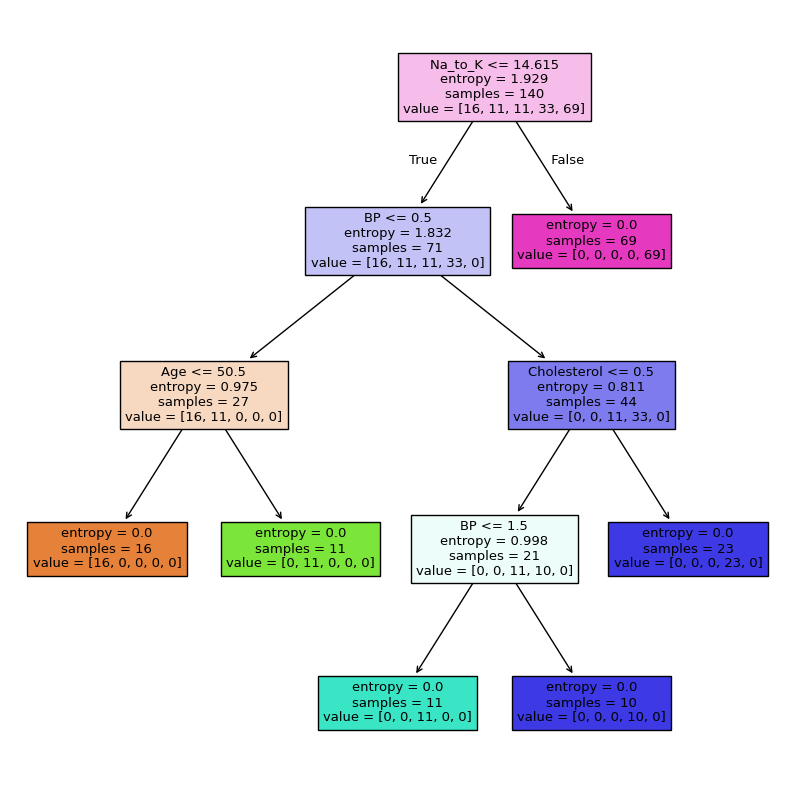

In [43]:
feature_names = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
feature_names = feature_names.columns.tolist()
plt.figure(figsize=(10, 10));
tree.plot_tree(model, feature_names=feature_names, filled=True)
plt.savefig('Decision-Tree medications1.png', dpi=450, transparent=True);
plt.savefig('Decision-Tree medications2.png', dpi=450);